In [ ]:
# Check Current Folder
Shows which folder the notebook is using. Makes sure the data files are in the right place.

In [2]:
import os
os.getcwd()

'/Users/meredithlo/Desktop/Sales Data Project/anaconda_projects/a6ec5123-0541-43ad-b313-f579932a2bf0'

In [ ]:
# List Files in Folder
Shows all files in the current folder so we can see if the data files are there.

In [3]:
os.listdir()


['sales-data2.ipynb',
 'fct_invoice.csv',
 'sales-data1.ipynb',
 'practice.ipynb',
 'sales-data.ipynb',
 '.ipynb_checkpoints',
 'dim_customer.json']

In [ ]:
# Load Data
Load the invoices and customers data files into pandas and show the first few rows to check they loaded correctly.

In [4]:
import pandas as pd

invoices = pd.read_csv("fct_invoice.csv")

customers = pd.read_json("dim_customer.json")

display(invoices.head())
display(customers.head())


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [ ]:
# Easy Question 1: Unique Customers
Count how many different customers are in the invoices dataset.


In [7]:
#Q1
unique_customers = invoices['customer_id'].nunique()
unique_customers

5191

In [ ]:
# Easy Question 2: Product Categories
Show all the product categories and count how many unique categories there are.


In [9]:
#Q2
categories = invoices['category'].unique()
num_categories = invoices['category'].nunique()
categories, num_categories

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

In [ ]:
# Easy Question 3: Most Popular Payment Method
Find the payment method used the most and how many times it was used.


In [10]:
#Q3
most_popular_payment = invoices['payment_method'].value_counts().idxmax()
times_used = invoices['payment_method'].value_counts().max()
most_popular_payment, times_used


('Cash', 44447)

In [ ]:
# Medium Question 1: Top 3 Categories by Sales
Calculate total sales for each category and show the three categories with the highest sales.


In [12]:
#Q1
invoices['total_sales'] = invoices['price'] * invoices['quantity']

top_categories = invoices.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
top_categories


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [ ]:
# Medium Question 2: Total Sales for Customers Over 45
Merge invoices with customer data and calculate total sales from customers older than 45.


In [13]:
#Q2

merged_data = invoices.merge(customers, left_on='customer_id', right_on='id', how='left')

over_45_sales = merged_data[merged_data['age'] > 45]['total_sales'].sum()
over_45_sales


np.float64(82039768.15)

In [ ]:
# Medium Question 3: Monthly Sales Distribution
Show how total sales change over time by month to look for seasonal trends or patterns.


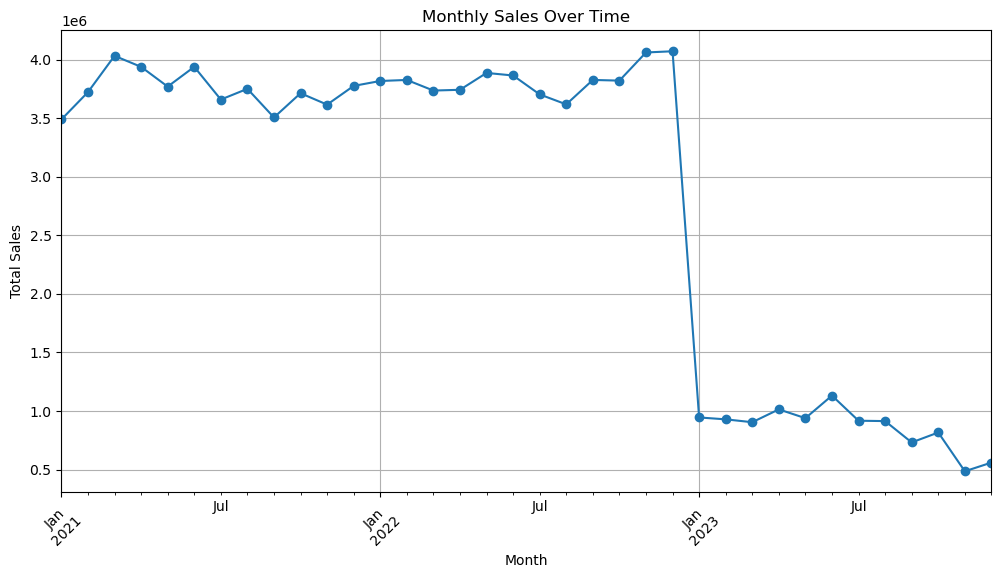

In [17]:
#Q3
import matplotlib.pyplot as plt
%matplotlib inline

invoices = invoices.copy()

invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], errors='coerce')
invoices = invoices.dropna(subset=['invoice_date'])  # drop invalid dates

invoices.loc[:, 'total_sales'] = invoices['price'] * invoices['quantity']

monthly_sales = invoices.groupby(invoices['invoice_date'].dt.to_period('M'))['total_sales'].sum()
monthly_sales = monthly_sales.sort_index()  # ensure chronological order

monthly_sales.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
**Observation:**  
- Peaks or dips in sales indicate seasonal trends.  
- For example, higher sales in December may show holiday shopping.  
- This graph helps identify months with high or low sales.


In [ ]:
# Hard Question: Prepare Data for Pivot Table
Merge invoices with customer data and create age ranges in decades (0-9, 10-19, etc.) for analysis.


In [18]:
#Q1 

merged_data = invoices.merge(customers, left_on='customer_id', right_on='id', how='left')

bins = range(0, 101, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
merged_data['age_range'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)


In [ ]:
# Hard Question: Pivot Table of Sales
Create a pivot table showing total sales by product category (rows) and age range (columns).


In [21]:

pivot_table = pd.pivot_table(
    merged_data,
    index='category',
    columns='age_range',
    values='total_sales',
    aggfunc='sum',
    fill_value=0,
    observed=False
)

pivot_table


age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,6226.65,31163.55,29754.60,35405.55,30512.10,34390.50,23512.80,11635.20,0.0
Clothing,0.0,747799.36,4127300.32,4695951.92,4302547.04,4095491.84,4223626.00,3167344.40,1702954.00,0.0
Cosmetics,0.0,56029.48,232209.26,284416.70,258882.22,240097.30,269372.50,156012.42,106000.62,0.0
Food & Beverage,0.0,6166.17,30271.24,34376.79,34648.75,30783.78,30307.85,22180.43,12358.49,0.0
Shoes,0.0,403914.41,2457696.15,3007451.87,2891018.89,2411483.06,2488904.99,1820315.61,1108513.99,0.0
Souvenir,0.0,5677.32,21759.15,21641.85,27131.49,18803.19,22122.78,14814.99,11084.85,0.0
Technology,0.0,467250.00,2386650.00,2196600.00,2602950.00,1512000.00,2253300.00,1423800.00,789600.00,0.0
Toys,0.0,23690.24,145510.40,172067.84,164720.64,139489.28,151925.76,113648.64,68992.00,0.0


In [ ]:
# Hard Question: Heatmap of Sales
Visualize the pivot table as a heatmap to see which age ranges buy more of each product category. Darker colors mean higher sales.


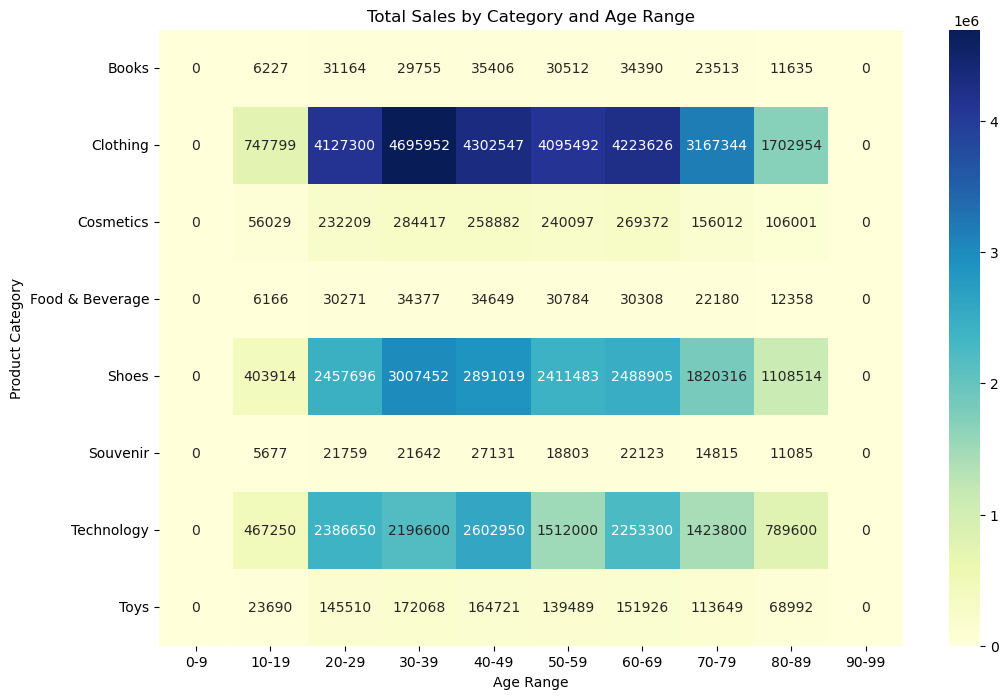

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Sales by Category and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Product Category')
plt.show()


In [ ]:
**Observation:**  
- The heatmap shows which age groups buy more of each category.  
- Darker squares indicate higher total sales.  
- For example, some categories are more popular with younger customers, others with older customers.
